In [1]:
import pandas as pd

player_playoff='/Users/Pashlene/Desktop/Modified_player_playoffs.csv'
player_playoff_career='/Users/Pashlene/Desktop/Modified_player_playoffs_career.csv'

player_playoff_df=pd.read_csv(player_playoff)
player_playoff_career_df=pd.read_csv(player_playoff_career)

In [6]:
player_playoff_df.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,dreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ARMSTPA01,1949,Paul,Armstrong,FTW,N,3,0,9,0,...,0,0,0,6,22,4,4,1,0,0
1,BARKECL01,1949,Cliff,Barker,INI,N,6,0,34,0,...,0,0,0,10,31,12,15,10,0,0
2,BARNHLE01,1949,Leo,Barnhorst,CH1,N,2,0,22,0,...,0,0,0,10,25,8,6,6,0,0
3,BEARDRA01,1949,Ralph,Beard,INI,N,5,0,66,0,...,0,0,0,11,70,22,28,22,0,0
4,BLACKCH01,1949,Charlie,Black,AND,N,8,0,57,0,...,0,0,0,38,61,18,29,21,0,0


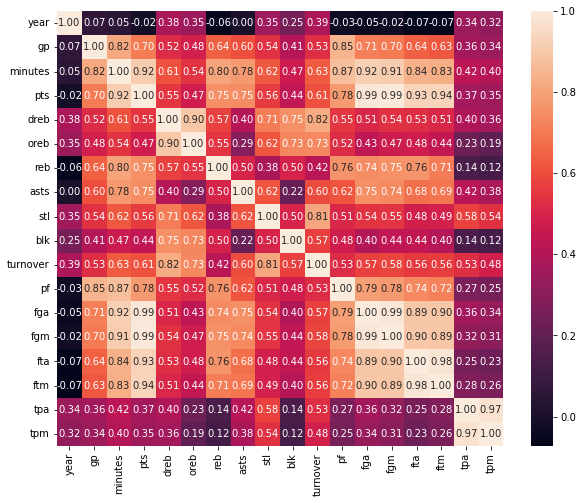

In [7]:
correlation_matrix =player_playoff_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [11]:
from sklearn.ensemble import IsolationForest
# Selecting the performance metrics columns for the Isolation Forest
#try to add more advanced metrics
performance_metrics = ['pts', 'oreb', 'dreb', 'asts', 'stl', 'blk']

# We will handle missing values by filling them with the median of the column
df_filled = player_playoff_df[performance_metrics].fillna(0)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(df_filled)

# Predict anomalies (the lower, the more anomalous)
scores = iso_forest.decision_function(df_filled)

# Add the scores to the original DataFrame to identify the players
player_playoff_df['anomaly_score'] = scores

In [12]:
# We will group the data by year and find the most outstanding player for each season based on the anomaly score
best_outstanding_player_each_season = player_playoff_df[player_playoff_df['year'].between(1949, 2004)].groupby('year').apply(lambda x: x.nsmallest(1, 'anomaly_score'))

# We are interested in the year, player's name, team, and their anomaly score
best_outstanding_players_season = best_outstanding_player_each_season[['ilkid', 'year', 'firstname', 'lastname', 'team', 'anomaly_score']].reset_index(drop=True)
best_outstanding_players_season


# We can even find the top 5,10 etc outstanding players per season
# We can find the outstanding players amongst the best players per season
# we can use another ML technique for the above to comlply with the aim of the project

,ilkid,year,firstname,lastname,team,anomaly_score
0,MIKANGE01,1949,George,Mikan,MIE,0.040237
1,DAVIEBO01,1950,Bob,Davies,ROC,0.058456
2,MCGUIDI01,1951,Dick,Mcguire,NYK,0.048090
3,MCGUIDI01,1952,Dick,Mcguire,NYK,0.094221
4,SEYMOPA01,1953,Paul,Seymour,SYR,0.087103
5,PHILLAN01,1954,Andy,Phillip,FTW,0.077529
6,ARIZIPA01,1955,Paul,Arizin,PH1,0.096049
7,COUSYBO01,1956,Bob,Cousy,BOS,0.032607
8,COUSYBO01,1957,Bob,Cousy,BOS,0.050898
9,COUSYBO01,1958,Bob,Cousy,BOS,-0.003506


In [3]:
player_playoff_career_df.head()

,ilkid,firstname,lastname,leag,gp,minutes,pts,dreb,oreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,17,106,38,17,3,20,...,0,1,11,11,40,18,4,2,0,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,237,8851,5762,833,355,2481,...,150,399,404,787,4422,2356,1419,1050,4,0
2,ABDULMA01,Mahmo,Abdul-rauf,N,15,415,195,18,5,23,...,7,1,22,37,187,69,45,43,49,14
3,ABDULTA01,Tariq,Abdul-wahad,N,13,178,68,24,17,41,...,4,4,4,14,63,24,24,20,3,0
4,ABERNTO01,Tom,Abernethy,N,13,226,68,0,0,42,...,0,0,0,18,54,22,29,24,0,0


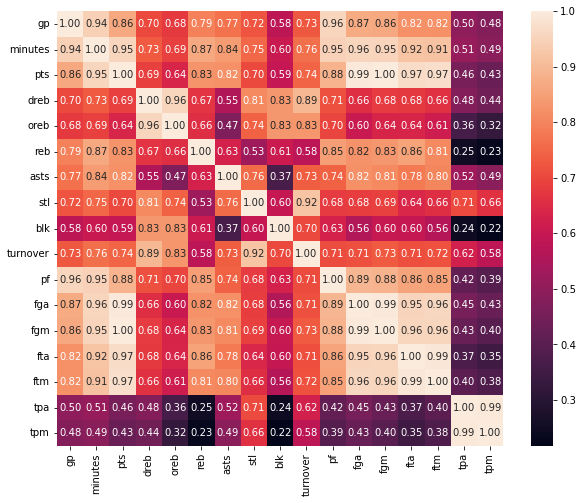

In [13]:
correlation_matrix =player_playoff_career_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [16]:
from sklearn.ensemble import IsolationForest
# Selecting the performance metrics columns for the Isolation Forest
#try to add more advanced metrics
performance_metrics = ['pts', 'oreb', 'dreb', 'asts', 'stl', 'blk']

# We will handle missing values by filling them with the median of the column
df_filled = player_playoff_career_df[performance_metrics].fillna(0)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(df_filled)

# Predict anomalies (the lower, the more anomalous)
scores = iso_forest.decision_function(df_filled)

# Add the scores to the original DataFrame to identify the players
player_playoff_career_df['anomaly_score'] = scores

# Sort the DataFrame based on the anomaly score to identify potential outstanding players
# The most outstanding players according to the model will have the lowest score
outstanding_players = player_playoff_career_df.sort_values('anomaly_score')

outstanding_players[['ilkid', 'firstname', 'lastname', 'anomaly_score']]


,ilkid,firstname,lastname,anomaly_score
1449,PIPPESC01,Scottie,Pippen,-0.288968
1371,ONEASH01,Shaquille,O'neal,-0.281236
956,JORDAMI01,Michael,Jordan,-0.280137
907,JOHNSMA01,Magic,Johnson,-0.279588
1360,OLAJUHA01,Hakeem,Olajuwon,-0.279040
...,...,...,...,...
1076,LENTZLA01,Larry,Lentz,0.209247
1207,MCKENST01,Stan,Mckenzie,0.209247
1227,MEHENDI01,Dick,Mehen,0.209247
693,HALBECH01,Chuck,Halbert,0.209247
